# ANALYZING MARKETING CAMPAIGNS PROJECT

- Analyzing marketing campaign performance <br>
- Attributing credit for conversions to marketing channels <br>
- A/B testing


In [71]:
# import package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

# read file
marketing = pd.read_csv('Marketing Campaign Project/marketing.csv')
# preview first few rows
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [72]:
# describe the data
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [73]:
# examine the data
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [74]:
# examine the data
print(marketing['converted'].dtype)

object


In [75]:
# convert the data type
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['converted'].dtype)

bool


In [76]:
# view house ads
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads', True, False)
# preview first few rows
print(marketing.is_house_ads.head(3))

0    True
1    True
2    True
Name: is_house_ads, dtype: bool


In [77]:
# map channel to code
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
# preview first few rows
print(marketing['channel_code'].head(3))

0    1.0
1    1.0
2    1.0
Name: channel_code, dtype: float64


In [78]:
# convert columns to datetime
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])

In [79]:
# How many users see marketing assets?
daily_user = marketing.groupby(['date_served'])['user_id'].nunique()
# preview the first few rows
print(daily_user.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


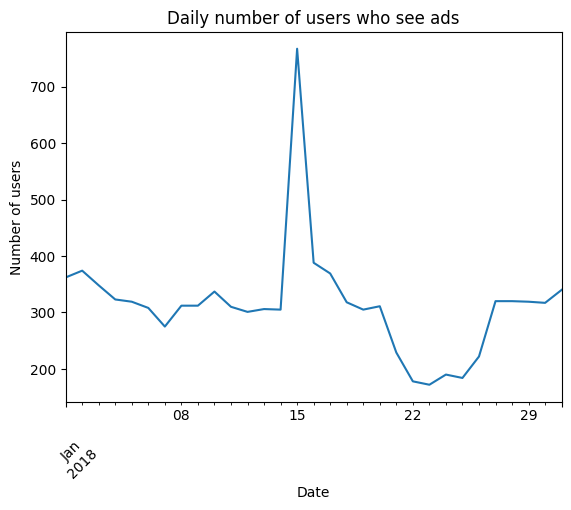

In [80]:
# Visualize Result
daily_user.plot()

plt.title('Daily number of users who see ads') 
plt.xlabel('Date') 
plt.ylabel('Number of users') 
plt.xticks(rotation = 45) 
plt.show() 


## Was the campaign successful?

- Common metrics:<br>
    - Conversion rate <br>
    - Retention rate <br>


In [81]:
# Calculating conversion rate 
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

total = marketing['user_id'].nunique()
conv_rate = subscribers/total

print(round(conv_rate*100, 2), '%')

14.09 %


In [82]:
# Calculating retention rate
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

retention = retained/subscribers
print(round(retention*100, 2), '%')


65.83 %


## Customer segmentation
- Common ways to segment audiences <br>
- Age <br>
- Gender <br>
- Location <br>
- Past interaction(s) with the business <br>
- Marketing channels users interacted with <br>


In [83]:
# Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']  
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique() 
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()  
retention_rate = retained/subscribers 
print(round(retention_rate*100, 2), '%')


58.05 %


In [84]:
# Group by subscribing_channel and calculate retention 
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique() 
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [85]:
# Group by subscribing_channel and calculate subscribers 
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique() 
print(subscribers)  

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [86]:
# Calculate the retention rate across the DataFrame 
channel_retention_rate = (retained/subscribers)*100 
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


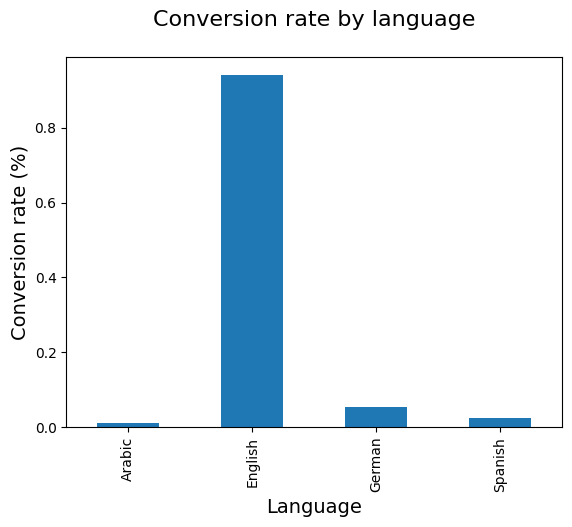

In [87]:
# Comparing language conversion rates
# Create a bar chart using channel retention DataFrame
language_conversion_rate = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()
language_conversion = (language_conversion_rate * 0.10) / 100
language_conversion.plot(kind = 'bar')
# Add a title and x and y-axis labels 
plt.title('Conversion rate by language\n', size = 16) 
plt.xlabel('Language', size = 14) 
plt.ylabel('Conversion rate (%)', size = 14) 
# Display the plot
plt.show()

In [88]:
# Group by date_subscribed and count unique users 
subscribed = marketing.groupby(['date_subscribed'])['user_id'].nunique()
# Group by date_subscribed and sum conversions
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()
# Calculate subscriber quality across dates 
daily_retention_rate = retained/subscribed
# preview the first few rows
print(daily_retention_rate.head(3))

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
Name: user_id, dtype: float64


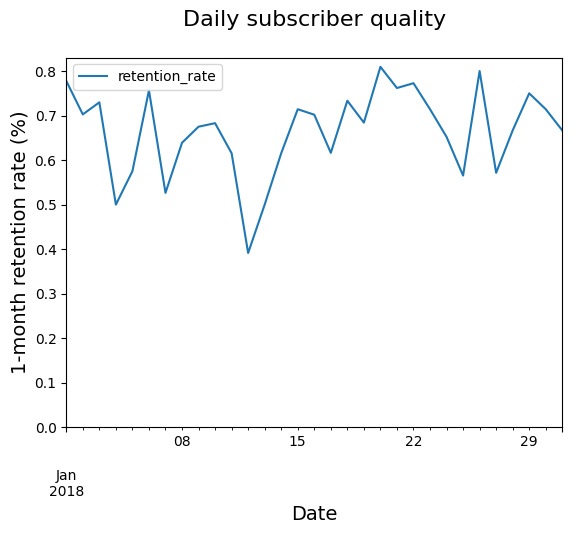

In [89]:
# Visualizing data
# Reset index to turn the Series into a DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
# Rename columns
daily_retention_rate.columns = ['date_subscribed','retention_rate']
# line chart
daily_retention_rate.plot('date_subscribed', 'retention_rate')
# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16) 
plt.ylabel('1-month retention rate (%)', size = 14) 
plt.xlabel('Date', size = 14) 
# y-axis to begin at 0
plt.ylim(0) 
# Display the plot
plt.show()

In [90]:
# group by language
language = marketing.groupby(['date_served','language_preferred'])['user_id'].count()  
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [91]:
# unstack
language = pd.DataFrame(language.unstack(level=1))  
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


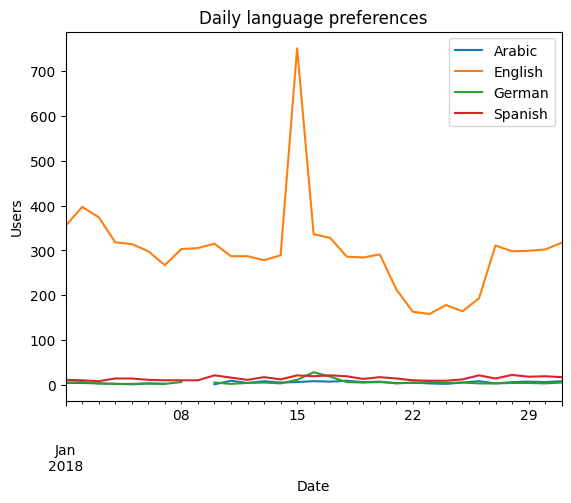

In [92]:
# Visualize the data
language.plot() 
plt.title('Daily language preferences') 
plt.xlabel('Date') 
plt.ylabel('Users') 
plt.legend(loc = 'upper right',labels = language.columns.values) 
plt.show()

In [93]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred','age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=0)) 
print(language_age.head()) 

language_preferred  Arabic  English  German  Spanish
age_group                                           
0-18 years              19     1421      31       68
19-24 years             26     1560      29       67
24-30 years             19     1442      35       72
30-36 years             19     1251      16       69
36-45 years             19     1260      19       55


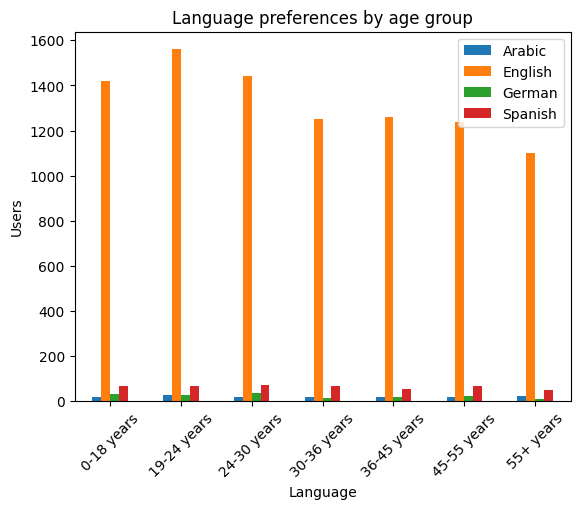

In [94]:
# grouped bar charts
language_age.plot(kind='bar') 
plt.title('Language preferences by age group') 
plt.xlabel('Language') 
plt.xticks(rotation = 45)
plt.ylabel('Users') 
plt.legend(loc = 'upper right',labels = language_age.columns.values) 
plt.show() 


## Automate analysis

In [95]:
# Count the subs by referring channel and day 
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()  
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Calculate the retention rate
daily_retention_rate = retention_subs/retention_total 
daily_retention_rate = pd.DataFrame(daily_retention_rate.unstack(level=1) )
# preview the first few rows
print(daily_retention_rate.head(5))

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            0.50  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


In [96]:
# retention function
def retention_rate(dataframe, column_names):     
    # Group by column_names and calculate retention     
    retained = dataframe[dataframe['is_retained'] == True] .groupby(column_names)['user_id'].nunique()      
    # Group by column_names and calculate conversion     
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()      
    retention_rate = retained/converted      
    return retention_rate

In [97]:
# Retention rate by channel
daily_retention = retention_rate(marketing,['date_subscribed','subscribing_channel'])  
daily_retention = pd.DataFrame(daily_retention.unstack(level=1) ) 
print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


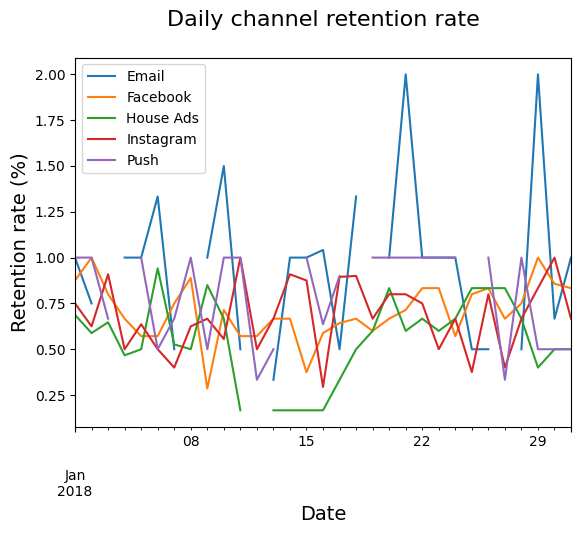

In [98]:
# Visualize the data
daily_retention.plot() 
plt.title('Daily channel retention rate\n', size = 16) 
plt.ylabel('Retention rate (%)', size = 14) 
plt.xlabel('Date', size = 14) 
plt.legend(loc = 'upper left')
plt.show() 

## A/B testing
- What is the desired outcome of the test? <br>
- What is our hypothesis? <br>
- What is the metric we are trying to impact (i.e., page views,conversions)? <br>
- Will we get enough traffic to our site to reach statistical significance and make a decision in a timely manner? <br>


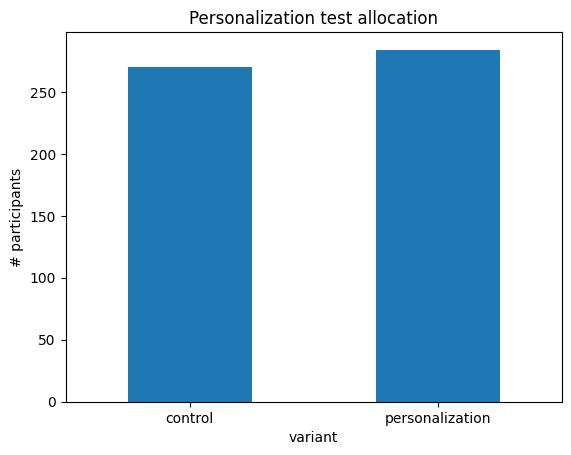

In [99]:
# Test allocation
email = marketing[marketing['marketing_channel'] == 'Email'] 
allocation = email.groupby(['variant'])['user_id'].nunique()   
allocation.plot(kind='bar') 
plt.title('Personalization test allocation') 
plt.xticks(rotation = 0) 
plt.ylabel('# participants') 
plt.show()

In [100]:
# Setting up data to evaluate the test
# Group by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()  
subscribers = pd.DataFrame(subscribers.unstack(level=1))  
# Drop missing values from the control column 
control = subscribers['control'].dropna()  
# Drop missing values from the personalization column 
personalization = subscribers['personalization'].dropna()

# Conversion rates
print("Control conversion rate:", np.mean(control)) 
print("Personalization conversion rate:", np.mean(personalization)) 

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [101]:
# Calculating lift & significance testing
# Calcuate the mean of a and b  
a_mean = np.mean(control) 
b_mean = np.mean(personalization) 
# Calculate the lift using a_mean and b_mean 
lift = (b_mean-a_mean)/a_mean 
print("lift:", str(round(lift*100, 2)) + '%')

lift: 38.85%
